# 機械学習におけるデータ表現の基礎

このノートブックでは、機械学習で扱う「画像」や「文字」などのデータが、どのように数値として表現されるのかを初歩から解説する。

---

## 画像データの数値表現（白黒画像）

白黒画像（グレースケール画像）は、各ピクセルが「明るさ（輝度）」を表す値で構成される。

- 画像は2次元の格子（配列）として表現される。
- 各ピクセルは0〜255の整数値（8ビット）で表されることが多い。
    - 0: 黒
    - 255: 白
    - その間の値: 灰色の濃淡

### 例：3×3ピクセルの白黒画像

グレースケールの画像は、次のような2次元配列（行列）として数値で表現できる。
実際に、`numpy.ndarray`でピクセル値を作成して、白黒画像を表示してみよう。

(-0.5, 2.5, 2.5, -0.5)

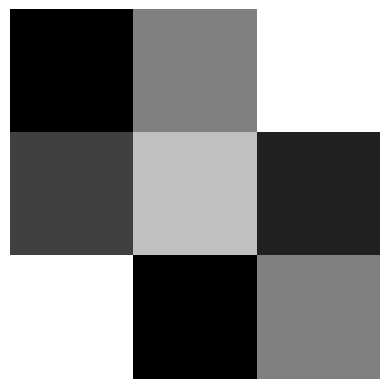

In [7]:
# 3x3の白黒画像を2次元配列で表現
import numpy as np
import matplotlib.pyplot as plt

gray_image = np.array([
    [0, 128, 255],
    [64, 192, 32],
    [255, 0, 128]
])

# 画像を表示
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 

---

## 画像データの数値表現（カラー画像）

カラー画像は、各ピクセルが「赤（R）」「緑（G）」「青（B）」の3つの成分で表現される。

- 各ピクセルは3つの値（R, G, B）を持つ。
- 画像全体は「高さ×幅×3（色）」の3次元配列になる。
- 各成分は0〜255の整数値で表されることが多い。

### 例：2×2ピクセルのカラー画像

| ピクセル位置 (行・列番号) | R | G | B |
|:---:|:---:|:---:|:---:|
| (0,0) | 255 | 0   | 0   |  # 赤
| (0,1) | 0   | 255 | 0   |  # 緑
| (1,0) | 0   | 0   | 255 |  # 青
| (1,1) | 255 | 255 | 0   |  # 黄

このような画像は、次のような3次元配列で表現される。


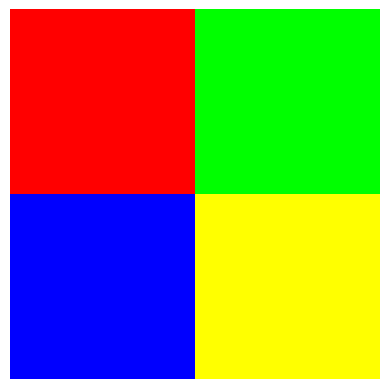

In [ ]:
# 2x2のカラー画像を3次元配列で表現
color_image = np.array([
    [[255, 0, 0], [0, 255, 0]],   # 1行目: 赤, 緑
    [[0, 0, 255], [255, 255, 0]]  # 2行目: 青, 黄
])
plt.imshow(color_image)
plt.axis('off') 
plt.show()

---

## 文字データの数値表現 (bit列との対応関係)

最も単純に文字を数値で表現する方法は、各文字に一意の整数を割り当てる方法である。  
例:
- A → 1
- B → 2
- C → 3
- Z → 26

大文字のアルファベットだけなら、1から26までの整数で表現できる。0か1をとるビットで表現するには、5ビットあれば十分である（2^5 = 32通り）。
対応関係は、右側のbitを1の位、左側に行くほど桁が上がると考えると、次のように表現することができる(ただし、別にこれが唯一の表現方法というわけではない)。

- A: 00001 = 1 (10進数)
- B: 00010 = 2 (10進数)
- C: 00011 = 3 (10進数)
- Z: 11010 = 26 (10進数)

右側から$n$桁目のbitが1であれば、$2^{(n-1)}$を足し合わせたものが10進数での値になる。


実際には、古くから使われているASCIIコードや、より多くの文字を表現できるUnicodeなどがある。
対応表が異なれば、同じ文字でも異なる数値になるため、文字化けの原因になることがある。
よく、csvファイルをテキストエディタやExcelなどのソフトウェアで開いたときに、文字化けして大量の糸偏の漢字が表示されることがあるが、これは文字コードの対応表が異なるために起こる現象である。


## 文字データの数値表現（埋め込みベクトルの概要）

上記のようなbit列との対応関係は、単純で分かりやすいが、より高度な自然言語処理にはビット数を増やすだけでは十分ではない。
というのも、例えば日本語の全ての単語をデータベース化して対応する整数を割り当てたとして、
「大学」と「大学院」が近い意味を持つことを、整数の大小関係や距離で表現することはできない。
単語の数が少なければまだしも、数十万語にもなると、整数の割り当てだけでは意味的な関係を表現できない。

特定の単語が他の単語とどれくらい意味的に近いか、あるいは文脈的に似ているかを数値で表現するには、**埋め込みベクトル（word embedding）** という方法が用いられる。

- 例：2次元の埋め込みベクトル
    - king → [0.8, 0.6]
    - queen → [0.7, 0.7]
    - apple → [0.1, 0.9]

このようなベクトル表現では、「意味が近い単語ほどベクトルの距離が近い」などの性質を持たせることができる。
要するに、それぞれの単語を$K$次元のベクトル空間にマッピングすることで、意味的な関係を捉えやすくする訳だ。
単に整数を割り当てる場合は、1次元の空間にマッピングしているのと同じであり、意味的な関係を表現するには不十分であるとも言える。

In [9]:
# 単語の埋め込みベクトル例 (あくまでかなり簡略化した例)
embedding = {
    'king':   [0.8, 0.6],
    'queen':  [0.7, 0.7],
    'apple':  [0.1, 0.9]
}

print("king-queenの距離:", np.linalg.norm(np.array(embedding['king']) - np.array(embedding['queen'])))
print("king-appleの距離:", np.linalg.norm(np.array(embedding['king']) - np.array(embedding['apple'])))
print("queen-appleの距離:", np.linalg.norm(np.array(embedding['queen']) - np.array(embedding['apple'])))

king-queenの距離: 0.14142135623730956
king-appleの距離: 0.761577310586391
queen-appleの距離: 0.6324555320336759


際の埋め込みベクトルはもっと高次元で表現・学習される。

こうした単語の埋め込みベクトルとして有名なものにGoogleが2013年に作成・公開した`Word2Vec`などがある。
コーパス（大量の文章データ）を数百程度の次元のベクトルに変換し、意味的に近い単語ほどベクトル空間上で近くなるように学習する。


ただし、より高度な自然言語処理には、埋め込みベクトル(決まった次元の空間でのベクトル表現)だけでは十分ではない場合がある。
というのも、単語の持つ意味は文脈によって変わることがあるからである。例を示そう。

- 「吉田は大学で物理を学んでいる。」
- 「ピ●チュウは物理よりで育ててるんだよね。」

:::{margin}
ここでの距離の大小はあくまで例示である。「物理」と「文学」は必ずしも距離が遠いとは限らない。例えば寺田寅彦は物理学者であると同時に俳人でもある。
:::
前者の「物理」は物理学の意味であり、「化学」「生物」「宇宙」などと距離が近く、「文学」などと距離が遠いかもしれない。
一方で、後者の「物理」は物理攻撃の意味であり、「攻撃」「ダメージ」などゲーム用語と意味合いが近く、「魔法」「特殊」などと若干距離が遠いかもしれない。


こうした文脈を捉えるうえでは、単語の埋め込みベクトルを文脈に応じて動的に変化させる手法が必要になり、Attention機構などが有効であることが知られている。
その最たる例が、大規模言語モデル(LLM)である。

## データのスケーリング

上記のように、様々なデータを数値で表現できる例は挙げたが、実際に機械学習で扱う際には、データのスケール・分布が重要になる場合が多い。
というのも、あらかじめ決めた規則に従ってデータを数値化しても、データのスケール(≒数値の範囲や分布)が異なると、機械学習モデルの学習がうまくいかないことがあるからである。

例えば上の画像データの例で、白黒画像のピクセル値は0〜255の範囲であるが、もし別のデータセットでピクセル値が限られた範囲で表現されている場合(つまり、人間には分かりにくい僅かな濃淡だけがある場合)、これらをそのまま同じモデルで学習させると、うまくいかないことがある。
その僅かな濃淡をもとに、例えばレントゲン写真から病理診断を行うと仮定した場合、ピクセル値の範囲が狭いと、モデルがその違いを学習しづらくなる可能性がある。

多くの機械学習モデルでは、データのスケールを揃えるために、データの平均を0、標準偏差を1にする **標準化（Standardization）** などと呼ばれる手法が用いられる。